In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading and Cleaning Data.

In [3]:
df = pd.read_csv("C:\\Users\\LOQ\\Downloads\\Titanic-Dataset.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.shape

(891, 12)

In [5]:
missing_values = (df.isnull().sum()/len(df))*100
missing_values

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [6]:
# Drop all categorical columns except ’Survived’
categorial_column = df.select_dtypes(include=['object']).columns
categorial_column

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [7]:
df = df.drop(columns=[col for col in categorial_column if col !="Survived"])

In [8]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [9]:
missing_values = (df.isnull().sum()/len(df))*100
missing_values

PassengerId     0.00000
Survived        0.00000
Pclass          0.00000
Age            19.86532
SibSp           0.00000
Parch           0.00000
Fare            0.00000
dtype: float64

In [10]:
#handle missing values
for column in df.columns:
    if missing_values[column] >10:
        df[column].fillna(df[column].mean(), inplace=True)
    else:
        df.dropna(subset=[column], inplace=True)


C:\Users\LOQ\AppData\Local\Temp\ipykernel_5220\21137076.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


In [11]:
# Display cleaned data
print("Data after processing:\n", df.head())
print("\nMissing values after processing:\n", df.isnull().sum())

Data after processing:
    PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            1         0       3  22.0      1      0   7.2500
1            2         1       1  38.0      1      0  71.2833
2            3         1       3  26.0      0      0   7.9250
3            4         1       1  35.0      1      0  53.1000
4            5         0       3  35.0      0      0   8.0500

Missing values after processing:
 PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64


Feature Matrix and Label Vector with Train - Test Split:

In [12]:
X = df.drop(columns=['Survived']).values
Y = df['Survived'].values
def train_test_split(X, Y, test_size=0.3,random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(X.shape[0]) #indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] depending acc to the row
    np.random.shuffle(indices) #indices (after shuffle) = [8, 2, 5, 9, 1, 6, 3, 0, 7, 4] (The order will be random each time, this is just an example)
    test_split_size = int(len(X) * test_size)  # int(10 * 0.3) = 3
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]
#     Visual:
# Based on our shuffled list: [8, 2, 5, 9, 1, 6, 3, 0, 7, 4]
# We draw a line after the 3rd item: [8, 2, 5 | 9, 1, 6, 3, 0, 7, 4]
# test_indices (for the exam) = [8, 2, 5]
# train_indices (for studying) = [9, 1, 6, 3, 0, 7, 4]

    X_train, X_test = X[train_indices], X[test_indices]
    Y_train, Y_test = Y[train_indices], Y[test_indices]

    return X_train, X_test, Y_train, Y_test

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
# Output shapes to verify
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", Y_train.shape)
print("Shape of y_test:", Y_test.shape)
    

Shape of X_train: (624, 6)
Shape of X_test: (267, 6)
Shape of y_train: (624,)
Shape of y_test: (267,)


Step - 2 - Computing Euclidean Distance Metrics:

In [22]:
def euclidean_distance(point1, point2):
    """
Calculate the Euclidean distance between two points in n-dimensional space.
Arguments:
point1 : np.ndarray
The first point as a numpy array.
point2 : np.ndarray
The second point as a numpy array.
Returns:
float
The Euclidean distance between the two points.
Raises:
ValueError: If the input points do not have the same dimensionality.
"""
    # Check if the points are of the same dimension
    if point1.shape != point2.shape:
        raise ValueError("point must be of same dimension")

    # Calculate the Euclidean distance
    distance = np.sqrt(np.sum((point1 - point2)**2))
    
    return distance
    

In [23]:
# Test case for the function
try:
    # Define two points
    point1 = np.array([3, 4])
    point2 = np.array([0, 0])
    # Calculate the distance
    result = euclidean_distance(point1, point2)
    # Check if the result matches the expected value (e.g., sqrt(3^2 + 4^2) = 5)
    expected_result = 5.0
    assert np.isclose(result, expected_result), f"Expected {expected_result}, but got {result}"
    print("Test passed successfully!")
except ValueError as ve:
    print(f"ValueError: {ve}")
except AssertionError as ae:
    print(f"AssertionError: {ae}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Test passed successfully!


Step - 3 - Implementation of core k-NN algorithm:

In [24]:
def knn_predict_single(query, X_train, Y_train, k=3):
    """
Predict the class label for a single query using the K-nearest neighbors algorithm.
Arguments:
query : np.ndarray
The query point for which the prediction is to be made.
X_train : np.ndarray
The training feature matrix.
y_train : np.ndarray
The training labels.
k : int, optional
The number of nearest neighbors to consider (default is 3).
Returns:
int
The predicted class label for the query.
"""
    distances = [euclidean_distance(query, x) for x in X_train]
    sorted_indices = np.argsort(distances)
    nearest_indices = sorted_indices[:k]
    nearest_labels = Y_train[nearest_indices]
    prediction = np.bincount(nearest_labels).argmax()
    return prediction


In [26]:
# Function to test KNN for all test samples
def knn_predict(X_test, X_train, Y_train, k=3):
    """
Predict the class labels for all test samples using the K-nearest neighbors algorithm.
Arguments:
X_test : np.ndarray
The test feature matrix.
X_train : np.ndarray
The training feature matrix.
y_train : np.ndarray
The training labels.
k : int, optional
The number of nearest neighbors to consider (default is 3).
Returns:
np.ndarray
An array of predicted class labels for the test samples.
    """
    predictions = [knn_predict_single(x, X_train, Y_train, k) for x in X_test]
    return predictions


In [42]:
try:
# Define the test set for the test case
    X_test_sample = X_test[:5] # Taking a small subset for testing
    y_test_sample = Y_test[:5] # Corresponding labels for the subset
    # Make predictions
    predictions = knn_predict(X_test_sample, X_train, Y_train, k=3)

     # Convert the list of predictions to a NumPy array
    predictions = np.array(predictions)
    
    # Print test results
    print("Predictions:", predictions)
    print("Actual labels:", y_test_sample)
    # Check if predictions match expected format
    assert predictions.shape == y_test_sample.shape, "The shape of predictions does not match the shape of the actual labels."
    print("Test case passed successfully!")
except AssertionError as ae:
    print(f"AssertionError: {ae}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Predictions: [0 1 0 0 0]
Actual labels: [1 0 0 1 1]
Test case passed successfully!


Step - 4 - Computing Accuracy:

In [43]:
# Function to compute accuracy of predictions
def compute_accuracy(y_true, y_pred):
    """
Compute the accuracy of predictions.
Arguments:
y_true : np.ndarray ; The true labels.
y_pred : np.ndarray; The predicted labels.
Returns:
float : The accuracy as a percentage (0 to 100).
    """
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = (correct_predictions / total_predictions) * 100
    return accuracy

In [46]:
try:
    # Make predictions on the entire test set
    predictions = knn_predict(X_test, X_train, Y_train, k=3)
    # Compute the accuracy
    accuracy = compute_accuracy(Y_test, predictions)
    # Print the accuracy
    print(f"Accuracy of the KNN model on the test set: {accuracy:.2f}%")
except Exception as e:
    print(f"An unexpected error occurred during prediction or accuracy computation: {e}")

Accuracy of the KNN model on the test set: 61.80%


Step - 5 - Experiment with different values of k:

In [38]:
# Function to test KNN on different values of k and plot the accuracies
import matplotlib.pyplot as plt
def experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values):
    """
Run KNN predictions for different values of k and plot the accuracies.
Arguments:
X_train : np.ndarray
The training feature matrix.
y_train : np.ndarray
The training labels.
X_test : np.ndarray
The test feature matrix.
y_test : np.ndarray
The test labels.
k_values : list of int
A list of k values to experiment with.
Returns:
dict
A dictionary with k values as keys and their corresponding accuracies as values.
    """
    accuracies = {}
    for k in k_values:
    # Make predictions using the current value of k
        predictions = knn_predict(X_test, X_train, y_train, k=k)
    # Compute the accuracy
        accuracy = compute_accuracy(y_test, predictions)
        accuracies[k] = accuracy
        print(f"Accuracy for k={k}: {accuracy:.2f}%")
    # Plot the accuracies
    plt.figure(figsize=(10, 5))
    plt.plot(k_values, list(accuracies.values()), marker='o')
    plt.xlabel('k (Number of Neighbors)')
    plt.ylabel('Accuracy (%)')
    plt.title('Accuracy of KNN with Different Values of k')
    plt.grid(True)
    plt.show()
    return accuracies

Accuracy for k=1: 58.43%
Accuracy for k=2: 62.55%
Accuracy for k=3: 61.80%
Accuracy for k=4: 63.30%
Accuracy for k=5: 64.42%
Accuracy for k=6: 64.42%
Accuracy for k=7: 65.17%
Accuracy for k=8: 64.42%
Accuracy for k=9: 65.17%
Accuracy for k=10: 64.04%
Accuracy for k=11: 64.04%
Accuracy for k=12: 64.79%
Accuracy for k=13: 64.79%
Accuracy for k=14: 65.92%
Accuracy for k=15: 65.17%
Accuracy for k=16: 65.92%
Accuracy for k=17: 66.67%
Accuracy for k=18: 66.29%
Accuracy for k=19: 67.79%
Accuracy for k=20: 64.79%


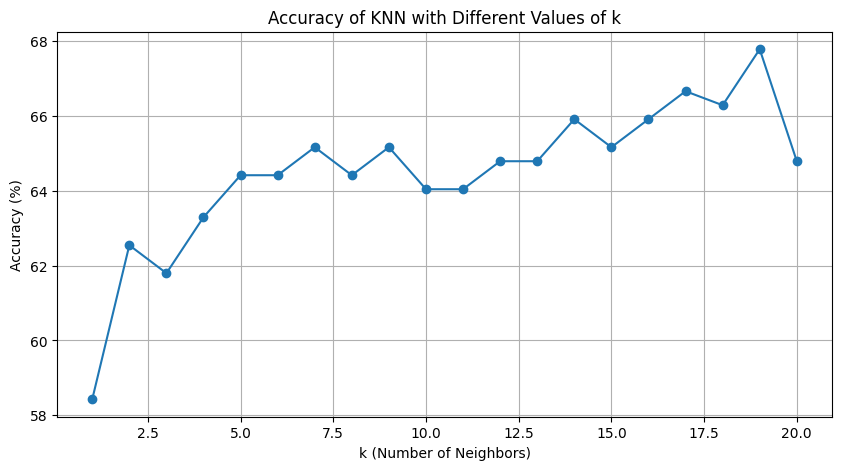

Experiment completed. Check the plot for the accuracy trend.


In [41]:
# Define the range of k values to experiment with
k_values = range(1, 21) # You can adjust this range as needed
# Run the experiment
try:
    accuracies = experiment_knn_k_values(X_train, Y_train, X_test, Y_test, k_values)
    print("Experiment completed. Check the plot for the accuracy trend.")
except Exception as e:
    print(f"An unexpected error occurred during the experiment: {e}")